In [1]:
import numpy as np
import pandas as pd
import json 
import seaborn as sns
import string
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from pingouin import multivariate_normality
pd.set_option('display.max_columns', None)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/charlesreinertson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/charlesreinertson/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Read in data

In [2]:
df = pd.read_csv('data/pre-processed.csv', index_col=None) 
df.head()

/Users/charlesreinertson/Desktop/School/grad/DATA515/env/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,title,cast,crew,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


# Only perform analysis on english movies

In [3]:
df = df[df['original_language'] == 'en']

# General EDA

In [4]:
# get index, columns, non_null count, data type, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4503 entries, 0 to 4798
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 4503 non-null   object 
 1   cast                  4503 non-null   object 
 2   crew                  4503 non-null   object 
 3   budget                4503 non-null   int64  
 4   genres                4503 non-null   object 
 5   id                    4503 non-null   int64  
 6   keywords              4503 non-null   object 
 7   original_language     4503 non-null   object 
 8   original_title        4503 non-null   object 
 9   overview              4503 non-null   object 
 10  popularity            4503 non-null   float64
 11  production_companies  4503 non-null   object 
 12  production_countries  4503 non-null   object 
 13  release_date          4503 non-null   object 
 14  revenue               4503 non-null   int64  
 15  runtime              

In [5]:
# change columns to correct data type
# change type of column
df["title"] = df["title"].astype("string")
df["original_language"] = df["original_language"].astype("string")
df["original_title"] = df["original_title"].astype("string")
df["overview"] = df["overview"].astype("string")
df["release_date"] = pd.to_datetime(df["release_date"])
df["status"] = df["status"].astype("string")
df["tagline"] = df["tagline"].astype("string")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4503 entries, 0 to 4798
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 4503 non-null   string        
 1   cast                  4503 non-null   object        
 2   crew                  4503 non-null   object        
 3   budget                4503 non-null   int64         
 4   genres                4503 non-null   object        
 5   id                    4503 non-null   int64         
 6   keywords              4503 non-null   object        
 7   original_language     4503 non-null   string        
 8   original_title        4503 non-null   string        
 9   overview              4503 non-null   string        
 10  popularity            4503 non-null   float64       
 11  production_companies  4503 non-null   object        
 12  production_countries  4503 non-null   object        
 13  release_date      

In [7]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.503000e+03,4503.000000,4503.000000,4.503000e+03,4503.000000,4503.000000,4503.000000
mean,3.040786e+07,55627.086387,22.187274,8.651726e+07,106.495225,6.068377,719.343105
std,4.151041e+07,86808.746123,32.516649,1.669837e+08,22.341001,1.178534,1263.547850
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000e+06,9021.500000,5.010111,0.000000e+00,93.000000,5.600000,58.500000
50%,1.500000e+07,14435.000000,13.706357,2.204428e+07,103.000000,6.200000,252.000000
75%,4.000000e+07,57104.000000,29.255485,9.821056e+07,117.000000,6.800000,788.500000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# Pre-Processing Steps of "Overview" Column

### Get a list of just the "overview" column

In [8]:
def to_list(df):
    
    return list(df['overview'])

### Make all terms lowercase
Return a numpy array

In [9]:
def lower_case(overview):
    
    return np.char.lower(overview)

### Remove stop words
The most commonly occurring words that don’t give any additional value to the document vector. 

In [10]:
def remove_stopwords(overview):

    overview = np.char.split(overview)

    cachedStopWords = stopwords.words("english")

    for i, value in enumerate(overview.tolist()):
        overview[i] = ' '.join([word for word in value if word not in cachedStopWords])  
    
    
    return list(overview)


### Remove punctuation
Except for the character "'" as we need that character when removing stopwords such as "hasn't"

In [11]:
def remove_punctuation(overview):
    stripPunct = str.maketrans('', '', ''.join(string.punctuation.split("'")))

    # works for 'any.string.inputted'
    return np.array([sentence.translate(stripPunct) for sentence in overview])

### Remove apostrophe

In [12]:
def remove_apostrophe(overview):
    stripPunct = str.maketrans('', '', "’‘''")

    return np.array([sentence.translate(stripPunct) for sentence in overview])


### Remove single characters
It is unlikely a single character will give us useful information

In [13]:
def remove_chars(overview):
    overview = np.char.split(overview)

    for i, value in enumerate(overview.tolist()):
        overview[i] = ' '.join([word for word in value if len(word) > 1])  
    
    
    return list(overview)

### Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.
<br><br>
-> rocks : rock <br>
-> corpora : corpus <br>
-> better : good 

In [14]:
def lemmatizer(overview):
    lemmatizer = WordNetLemmatizer()

    for i, value in enumerate(overview.tolist()):
        pos_tag(word_tokenize(value))
        lemma = []
        
        for word, tag in pos_tag(word_tokenize(value)):
            wntag = tag[0].lower()
            wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
            if not wntag:
                lemma.append(word)
            else:
                lemma.append(lemmatizer.lemmatize(word, wntag))
        
        overview[i] = ' '.join(lemma)
    
    return list(overview)

## Pre-Processing Order of Steps

In [15]:
# Get a list of just the "overview" column
overview = to_list(df)
print("-------Step 1: To list-------")
print(overview[2:3])
print('')

overview = lower_case(overview)
print("-------Step 2: Lower case-------")
print(overview[2:3])
print('')

overview = remove_punctuation(overview)
print("-------Step 3: Remove punctuation-------")
print(overview[2:3])
print('')

overview = remove_chars(overview)
print("-------Step 4: Remove single characters-------")
print(overview[2:3])
print('')

overview = remove_stopwords(overview)
print("-------Step 5: Remove stopwords-------")
print(overview[2:3])
print('')

# remove apostrophe after remove stopwords as "doesn't" is a stopword for example
overview = remove_apostrophe(overview)
print("-------Step 6: Remove apostrophe-------")
print(overview[2:3])
print('')

overview = lemmatizer(overview)
print("-------Step 7: Lemmatizing-------")
print(overview[2:3])
print('')

# after lemmtizer some single characters are created
overview = remove_chars(overview)
print("-------Step 8: Remove single characters, again-------")
print(overview[2:3])
print('')

-------Step 1: To list-------
['A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.']

-------Step 2: Lower case-------
['a cryptic message from bond’s past sends him on a trail to uncover a sinister organization. while m battles political forces to keep the secret service alive, bond peels back the layers of deceit to reveal the terrible truth behind spectre.']

-------Step 3: Remove punctuation-------
['a cryptic message from bond’s past sends him on a trail to uncover a sinister organization while m battles political forces to keep the secret service alive bond peels back the layers of deceit to reveal the terrible truth behind spectre']

-------Step 4: Remove single characters-------
['cryptic message from bond’s past sends him on trail to uncover sinister organization while battles political for

# Get TF-IDF of Overview Column
TF = (Number of time the word occurs in the text) / (Total number of words in text) <br>
IDF = (Total number of documents / Number of documents with word t in it) <br>
TF-IDF = TF * IDF

However, sklearn calculates idf as idf(t) = log [ (1 + n) / (1 + df(t)) ] + 1.

### Convert a collection of text documents to a matrix of token counts.

In [16]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(overview)

In [17]:
vectorizer.get_feature_names_out()[1000:1020]

array(['angelina', 'angelov', 'angels', 'anger', 'angie', 'anglade',
       'angle', 'anglican', 'anglo', 'angloirish', 'anglomaratha',
       'angrily', 'angry', 'angst', 'angus', 'animal', 'animalsand',
       'animalwarriors', 'animate', 'animated'], dtype=object)

In [18]:
X.toarray().shape

(4503, 18918)

### We transform a count matrix to a standardized TF-IDF representation to measure weights

In [19]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(X)

### Get the top 10 words by greatest TF-IDF

In [20]:
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'weight': weights})
# word_weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df.sort_values(by='weight', ascending=False).head(10)

,term,weight
9949,life,0.015623
6451,find,0.014790
11737,new,0.013121
18837,young,0.012580
12162,one,0.012341
18699,world,0.011675
10462,man,0.011403
7112,get,0.011267
16606,take,0.011110
17477,two,0.011003


# Determine if the standardized summation of IDF scores of all words in each movie overview correlates with popularity
sum(IDF weights of each word per sentence of overview) / count(words in each sentence of overview)

### Create a new dataframe column "TF-IDF Total"
This column is the standardized sum of each word in the "Overviews" column's IDF score

In [21]:
# a list of the idf of each word
idf_per_word = transformer.idf_.tolist()

In [22]:
# dictionary with key as term and value and idf of term
idf_dict = dict(value for value in zip(weights_df['term'], idf_per_word))

In [23]:
overview = np.char.split(list(overview))
tfidf_count = []

for i, sentence in enumerate(overview.tolist()):
    sum_weights = np.array([idf_dict[word] for word in sentence if word in idf_dict]).sum()
    sentence_length = len(sentence)
    if sentence_length != 0:
        tfidf_count.append(sum_weights / sentence_length)
    else:
        tfidf_count.append(0)

### Create a new dataframe of all relevant information for the final analysis

In [24]:
df = pd.DataFrame({'Popularity':list(df['popularity']),'Overview':overview, 'TF-IDF Total': tfidf_count})

In [25]:
df.head()

,Popularity,Overview,TF-IDF Total
0,150.437577,"[22nd, century, paraplegic, marine, dispatch, ...",5.988629
1,139.082615,"[captain, barbossa, long, believe, dead, come,...",5.522213
2,107.376788,"[cryptic, message, bond, past, sends, trail, u...",5.783325
3,112.312950,"[follow, death, district, attorney, harvey, de...",6.091209
4,43.926995,"[john, carter, warweary, former, military, cap...",5.961692


### Determine if the standardized summation of IDF scores of words in a movie overview correlates with popularity
Understand the relationships between two variables at a time via a pairwise plot. We must log transform "TF-IDF Total" to solve for non-constant variance

In [26]:
# remove index where TF-IDF Total is equal to zero. It is an empty overview description
df = df[np.logical_not(np.isclose(df['TF-IDF Total'], 0))]

# log tranform "TF-IDF Total"
df['LOG TF-IDF Total'] = np.log10(df['TF-IDF Total'])

In [62]:
#  crate a dataframe of means of numeric columns along intervals of "TF-IDF Total"
data_points_to_keep = 10
max_tf_idf = np.max(df['TF-IDF Total'])
min_tf_idf = np.min(df['TF-IDF Total'])
list_df_means = []

last = min_tf_idf

outliers_df = df[(df['TF-IDF Total'] < min_tf_idf + 0.4) | (df['TF-IDF Total'] >= max_tf_idf - 1.1)]

for i, value in enumerate(np.arange(min_tf_idf + 0.4, max_tf_idf - 1.1, 0.05)):
    holder_df = df[(df['TF-IDF Total'] < value) & (df['TF-IDF Total'] >= last)]
    if holder_df.shape[0] > 0:
        list_df_means.append(holder_df[["Popularity","TF-IDF Total", "LOG TF-IDF Total"]].mean())
    last = value

In [63]:
df_smoothed = pd.concat([pd.DataFrame.from_records(list_df_means), 
                outliers_df[["Popularity","TF-IDF Total", "LOG TF-IDF Total"]]])
# df_smoothed = pd.DataFrame.from_records(list_df_means)
df_smoothed.reset_index(drop=True, inplace=True)
df_smoothed

,Popularity,TF-IDF Total,LOG TF-IDF Total
0,12.416823,4.461176,0.649336
1,16.393236,4.610702,0.663765
2,13.714240,4.656333,0.668041
3,10.590919,4.708130,0.672847
4,33.381399,4.751426,0.676822
...,...,...,...
74,0.143784,7.639191,0.883047
75,0.018087,8.257476,0.916847
76,0.493223,4.528336,0.655939
77,13.971674,4.563156,0.659265


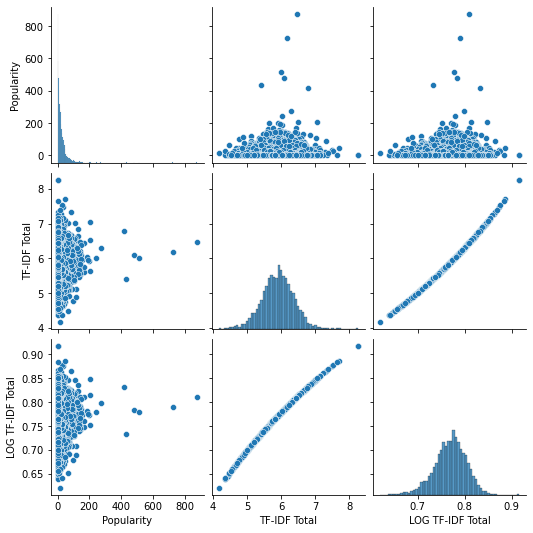

In [64]:
# without taking the mean of a rolling window
dfs = df[list(df._get_numeric_data().columns)]
sns.pairplot(dfs)  # pairwise plots - may take a long time to run
plt.show()

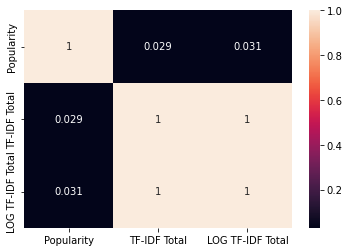

In [65]:
# pearson correlation matrix without taking the mean of a rolling window
correlation_mat = df[list(df._get_numeric_data().columns)].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

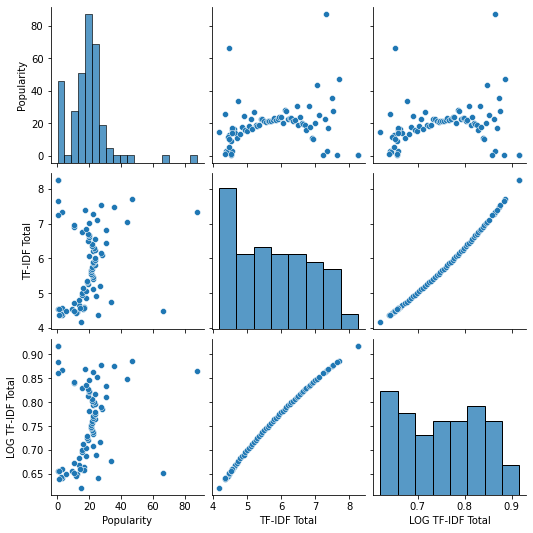

In [66]:
# with taking the mean of a rolling window
dfs = df_smoothed
sns.pairplot(dfs)  # pairwise plots - may take a long time to run
plt.show()

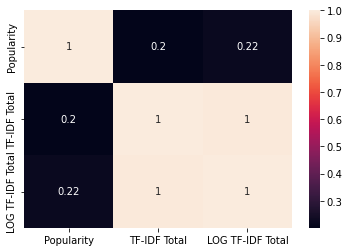

In [67]:
# pearson correlation matrix with taking the mean of a rolling window
correlation_mat = df_smoothed.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

The Henze-Zirkler Multivariate Normality Test determines whether or not a group of variables follows a multivariate normal distribution. The null and alternative hypotheses for the test are as follows:

H0 (null): The variables follow a multivariate normal distribution.

Ha (alternative): The variables do not follow a multivariate normal distribution.

In [68]:
#perform the Henze-Zirkler Multivariate Normality Test
multivariate_normality(dfs, alpha=.05)

# This tells us that our results are not normal

HZResults(hz=7.295261216550768, pval=1.4508018893514275e-30, normal=False)

# Key findings:
There is no correlation between using rare or commonly used words in a movie description and the movie popularity. However, the most popular movies all use words that are not too rare but not too common on average. 

In [69]:
pd.set_option('max_colwidth', 1000)

### TF-IDF combined score low examples

In [70]:
df.sort_values(by='TF-IDF Total', ascending=True).head(10)

,Popularity,Overview,TF-IDF Total,LOG TF-IDF Total
1852,14.562197,"[young, girl, send, live, father, new, girlfriend, discovers, creatures, new, home, want, claim, one]",4.178819,0.621054
3147,0.812776,"[young, woman, find, mother, work, spy, british, secret, service, world, war, ii, run, ever, since]",4.359506,0.639437
3260,25.613197,"[mother, daughter, move, new, town, find, live, next, door, house, young, girl, murder, parent, daughter, befriends, survive, son, learns, story, far]",4.369742,0.640456
1433,2.877488,"[time, war, disease, young, officer, gallantly, try, help, young, woman, find, husband]",4.382307,0.641703
2790,2.303865,"[story, woman, love, dog, husband, husband, lose, dog]",4.400813,0.643533
3020,11.431434,"[two, brother, trouble, path, find, middle, one, last, bank, job]",4.430324,0.646435
3243,5.038953,"[two, friend, name, gerry, become, lost, desert, take, wrong, turn, attempt, find, way, home, lead, trouble]",4.470365,0.650343
3463,10.095184,"[life, happy, couple, turn, upside, young, son, die, accident]",4.481160,0.651390
2669,66.113340,"[jack, young, boy, year, old, live, life, one, room, believe, everything, within, real, thing, world, happen, suddenly, tell, thing, outside, room]",4.481764,0.651449
4454,0.833937,"[two, best, friend, film, comedy, get, revenge, bully, high, school, one, joking]",4.527364,0.655845


### TF-IDF combined score medium examples

In [71]:
df.sort_values(by='TF-IDF Total', ascending=False)[2250:2260]

,Popularity,Overview,TF-IDF Total,LOG TF-IDF Total
2766,16.405120,"[troubled, hedge, fund, magnate, desperate, complete, sale, trading, empire, make, error, force, turn, unlikely, person, help]",5.917725,0.772155
3046,11.233081,"[college, dropout, get, job, broker, suburban, investment, firm, put, fast, track, success, job, might, legitimate, sound]",5.917650,0.772149
3711,23.299907,"[meet, jesse, celine, nine, year, greece, almost, two, decade, pass, since, first, meeting, train, bound, vienna]",5.917627,0.772148
257,23.336875,"[sandra, bullock, jason, patric, star, young, couple, whose, dream, cruise, turn, terror, lunatic, computer, genius, willem, dafoe, set, new, course, destruction]",5.917364,0.772128
3883,3.980072,"[1972, seemingly, typical, shoestring, budget, pornographic, film, make, florida, hotel, deep, throat, star, linda, lovelace, film, would, surpass, wildest, expectation, everyone, involve, become, one, successful, independent, film, time, catch, public, imagination, meet, spirit, time, even, self, appoint, guardian, public, morality, struggle, suppress, create, brief, moment, possible, future, sexuality, film, bold, artistic, potential, film, cover, story, make, controversial, film, stun, success, hysterical, opposition, along, dark, side, mob, influence, allegation, set, mistreatment, film, star, short, combine, event, would, redefine, popular, appeal, pornography, even, cynical, development, would, lead, path]",5.916719,0.772081
1566,45.083509,"[deny, woman, extension, need, keep, home, loan, officer, christine, brown, see, oncepromising, life, take, startle, turn, worse, christine, convince, cursed, gypsy, boyfriend, skeptical, hope, seem, lie, psychic, claim, help, lift, curse, keep, soul, drag, straight, hell]",5.916542,0.772068
3264,17.705671,"[boyz, hood, popular, successful, film, social, criticism, john, singleton, condition, south, central, los, angeles, teenager, involve, gun, fight, drug, deal, daily, basis]",5.916224,0.772045
3027,3.193777,"[teenager, attend, fantasy, writer, convention, discovers, idea, steal, establish, novelist]",5.915974,0.772026
1038,10.411996,"[office, temp, charlotte, cantilini, think, find, mr, right, start, date, gorgeous, surgeon, dr, kevin, field, there, problem, stand, way, everlasting, bliss, kevins, overbear, control, mother, viola, fear, shell, lose, son, affection, forever, viola, decides, break, happy, couple, become, world, worst, motherinlaw]",5.915730,0.772008
1316,100.348805,"[veteran, pot, dealer, creates, fake, family, part, plan, move, huge, shipment, weed, us, mexico]",5.915611,0.772000


### TF-IDF combined score high examples

In [72]:
df.sort_values(by='TF-IDF Total', ascending=False).head(10)

,Popularity,Overview,TF-IDF Total,LOG TF-IDF Total
4351,0.018087,"[prequel, 5th, degree]",8.257476,0.916847
3524,0.177356,"[la, vida, ha, llevado, julián, pérez, por, caminos, equivocados, pero, el, destino, le, presentará, este, hombre, la, oportunidad, de, encontrar, su, redención, cuando, es, enviado, la, misión, más, peligrosa, noble, de, toda, su, vida, una, misión, ordenada, por, la, única, autoridad, que, todavía, respeta, su, madre, doña, elvira, julián, debe, viajar, hasta, el, otro, extremo, del, mundo, un, lugar, llamado, irak, traer, de, vuelta, vivo, su, hermano, menor, el, soldado, de, infantería, juan, pérez, con, la, promesa, hecha, julián, pérez, regresa, su, natal, sinaloa, donde, reclutará, un, comando, de, elite, destinado, cumplir, una, misión, suicida, viajar, irak, salvar, al, soldado, ...]",8.255839,0.916761
553,46.875375,"[homer, accidentally, pollute, towns, water, supply, springfield, encase, gigantic, dome, epa, simpson, declare, fugitive]",7.691638,0.886019
4026,0.143784,"[oncefamous, painter, rediscovers, inspiration, befriends, sleepwalk, cannibal]",7.639191,0.883047
207,27.220157,"[ad, 922, arab, courtier, ahmad, ibn, fadlan, accompany, party, viking, barbaric, north, combat, terror, slaughter, viking, devours, flesh]",7.522553,0.876365
150,35.601665,"[6thcentury, scandinavian, warrior, beowulf, embark, mission, slay, manlike, ogre, grendel, descendant, cain]",7.486725,0.874292
3616,17.234745,"[tv, network, cynically, exploit, derange, extv, anchor, rave, revelation, medium, profit]",7.389664,0.868625
3224,2.881239,"[street, smart, rapper, christopher, cnote, hawkins, big, boi, applies, membership, allwhite, carolina, pine, country, club, establishments, proprietor, hardly, ready, oblige]",7.342973,0.865872
1050,87.350802,"[behalf, oppress, bug, everywhere, inventive, ant, name, flik, hire, troupe, warrior, bug, defend, bustle, colony, horde, freeload, grasshopper, lead, evilminded, hopper]",7.326305,0.864885
141,22.550135,"[london, highsociety, mouse, roddy, flush, toilet, sid, common, sewer, rat, hang, madcap, adventure, deep, sewer, bowel, ratropolis, roddy, meet, resourceful, rita, rodenthating, toad, faithful, thug, spike, whitey]",7.285168,0.862440


### Look at IDF score of a single word

In [73]:
idf_dict['deep']

5.651521054125964

# Save Dataframe to CSV for statistical analysis in R

In [74]:
df.to_csv('out.csv', index=False)

In [75]:
df_smoothed.to_csv('out_windowed_mean.csv', index=False)